In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/FBLA_Data_Analysis')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/FBLA_Electric_Vehicles_UK_Price.csv', header = None)

In [5]:
data

,0,1
0,Citroen e-C3,21000
1,BYD DOLPHIN 44.9 kWh Active,26000
2,MG MG4 EV Standard Range,26995
3,Fiat 500e Hatchback 24 kWh,28195
4,BYD DOLPHIN 44.9 kWh Boost,28500
...,...,...
222,Porsche Taycan Turbo S Sport Turismo,149300
223,Porsche Taycan Turbo S Cross Turismo,149300
224,BMW i7 M70 xDrive,163315
225,Maserati GranTurismo Folgore,200000


In [6]:
data.columns = ['car', 'price']

In [7]:
data['price'] = round(data['price'] * 1.27).astype(int)

In [8]:
data

,car,price
0,Citroen e-C3,26670
1,BYD DOLPHIN 44.9 kWh Active,33020
2,MG MG4 EV Standard Range,34284
3,Fiat 500e Hatchback 24 kWh,35808
4,BYD DOLPHIN 44.9 kWh Boost,36195
...,...,...
222,Porsche Taycan Turbo S Sport Turismo,189611
223,Porsche Taycan Turbo S Cross Turismo,189611
224,BMW i7 M70 xDrive,207410
225,Maserati GranTurismo Folgore,254000


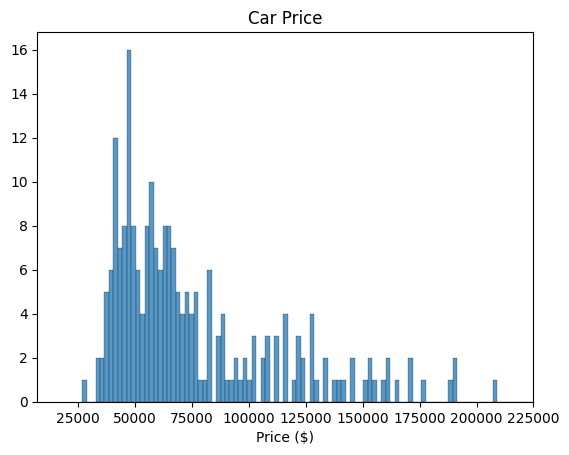

In [9]:
sns.histplot(x = data['price'], bins = 200)
plt.xlabel('Price ($)')
plt.ylabel('')
plt.title('Car Price')
ax = plt.gca()
ax.set_xlim(right = 225000)
plt.show()

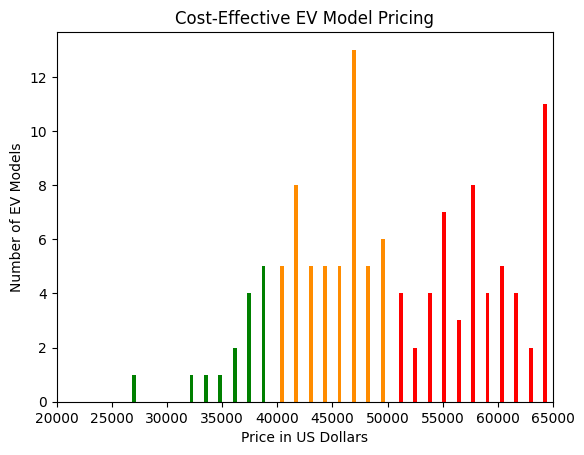

In [10]:
optimal_d = data['price'][data['price'] <= 40000]
sub_optimal_d = data['price'][data['price'] > 40000][data['price'] < 50000]
non_optimal_d = data['price'][data['price'] > 50000]

plt.hist([optimal_d, sub_optimal_d, non_optimal_d], color=['green', 'darkorange', 'red'], bins = 300)
plt.xlabel('Price in US Dollars')
plt.ylabel('Number of EV Models')
plt.title('Cost-Effective EV Model Pricing')

ax = plt.gca()
ax.set_xlim(left = 20000, right = 65000)

plt.show()

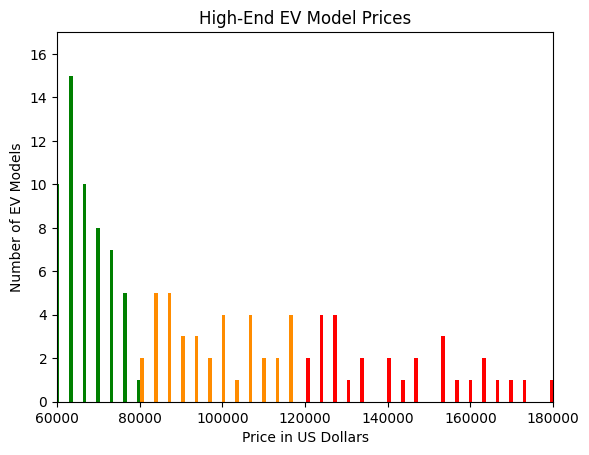

In [11]:
optimal_d = data['price'][data['price'] <= 80000]
sub_optimal_d = data['price'][data['price'] > 80000][data['price'] < 120000]
non_optimal_d = data['price'][data['price'] > 120000]

plt.hist([optimal_d, sub_optimal_d, non_optimal_d], color=['green', 'darkorange', 'red'], bins = 120)
plt.xlabel('Price in US Dollars')
plt.ylabel('Number of EV Models')
plt.title('High-End EV Model Prices')

ax = plt.gca()
ax.set_xlim(left = 60000, right = 180000)
ax.set_ylim(bottom = 0, top = 17)
plt.show()

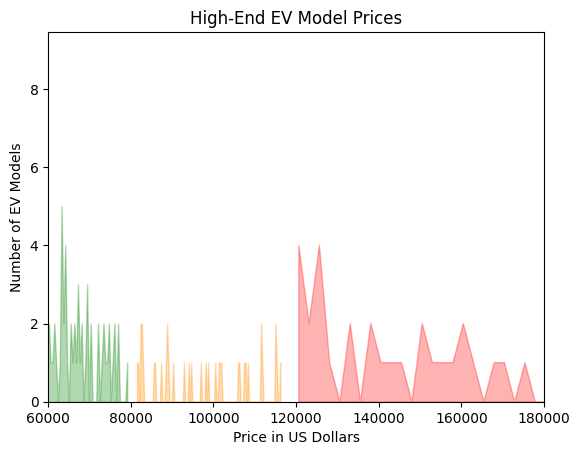

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Separate data into different price ranges
optimal_d = data['price'][data['price'] <= 80000]
sub_optimal_d = data['price'][(data['price'] > 80000) & (data['price'] < 120000)]
non_optimal_d = data['price'][data['price'] >= 120000]

# Create histograms without plotting bars
hist_optimal, bin_edges_optimal = np.histogram(optimal_d, bins=120)
hist_sub_optimal, bin_edges_sub_optimal = np.histogram(sub_optimal_d, bins=120)
hist_non_optimal, bin_edges_non_optimal = np.histogram(non_optimal_d, bins=120)

# Plot solid fill underneath each histogram bar
plt.fill_between(bin_edges_optimal[:-1], hist_optimal, color='green', alpha=0.3)
plt.fill_between(bin_edges_sub_optimal[:-1], hist_sub_optimal, color='darkorange', alpha=0.3)
plt.fill_between(bin_edges_non_optimal[:-1], hist_non_optimal, color='red', alpha=0.3)

# Set axis limits
ax = plt.gca()
ax.set_xlim(left=60000, right=180000)
ax.set_ylim(bottom=0)

# Add labels and title
plt.xlabel('Price in US Dollars')
plt.ylabel('Number of EV Models')
plt.title('High-End EV Model Prices')

plt.show()


In [13]:
data['price']

0       26670
1       33020
2       34284
3       35808
4       36195
        ...  
222    189611
223    189611
224    207410
225    254000
226    419100
Name: price, Length: 227, dtype: int64

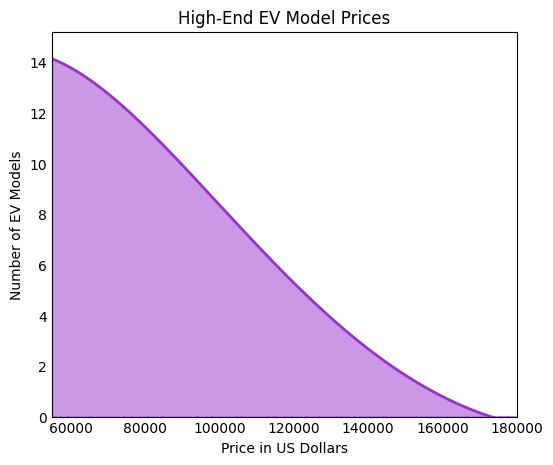

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curve_fit(data, bins=30, degree=3, figsize=(6, 5)):
    fig, ax = plt.subplots(figsize=figsize)

    n, bins = np.histogram(data['price'].dropna(), bins=bins)

    x = (bins[:-1] + bins[1:]) / 2
    coeffs = np.polyfit(x, n, degree)
    poly = np.poly1d(coeffs)

    x_smooth = np.linspace(min(x), max(x), 300)
    y_smooth = poly(x_smooth)

    ax.fill_between(x_smooth, y_smooth, color='darkorchid', alpha=0.5)

    ax.plot(x_smooth, y_smooth, color='darkorchid', linewidth=2)

    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(False)

    ax.set_xlim(left = 55000, right = 180000)
    ax.set_ylim(bottom = 0)

    plt.xlabel('Price in US Dollars')
    plt.ylabel('Number of EV Models')
    plt.title('High-End EV Model Prices')

    plt.show()

plot_curve_fit(data, bins=75, degree=5)